In [38]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
! tree

.
└── marie_dataexploration.ipynb

0 directories, 1 file


In [9]:
## data exploration
# load data

df1 = pd.read_csv('../goodtrainbadtrain/data/select_2020.csv',encoding='iso-8859-2',sep=';')
df2 = pd.read_csv('../goodtrainbadtrain/data/select_2021.csv',encoding='iso-8859-2',sep=';')
df3 = pd.read_csv('../goodtrainbadtrain/data/select_2022.csv',encoding='iso-8859-2',sep=';')

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
0,EC 6,2019-12-15,Basel Bad Bf,1433,0,1434,0
1,EC 6,2019-12-15,Basel SBB,9999,0,1426,0
2,EC 6,2019-12-15,Bonn Hbf,1844,0,1845,0
3,EC 6,2019-12-15,Bremen Hbf,2217,2,2219,2
4,EC 6,2019-12-15,Duisburg Hbf,1945,6,1946,6


In [13]:
#add data together
df = pd.concat([df1, df2, df3])

In [27]:
unique_train_num = df.zugnr.value_counts()
unique_train_num #data cleaning needed, some ICE just mentioned once

IC 2216     20581
EC 6        20048
ICE 619     19544
ICE 1020    17818
ICE 929     17637
            ...  
ice 726         1
ice 206         1
ICe 614         1
ICe 598         1
ICe 26          1
Name: zugnr, Length: 156, dtype: int64

In [28]:
print(df.bhf.value_counts())

Frankfurt(M) Flughafen Fernbf    66571
München Hbf                      61736
Frankfurt(Main)Hbf               55379
Mannheim Hbf                     49640
Nürnberg Hbf                     46341
                                 ...  
Hohenems                           144
Götzis                             143
Rankweil                           143
Köln Süd                            33
Wanne-Eickel Hbf                     1
Name: bhf, Length: 134, dtype: int64


In [29]:
df_filtered = df.query("bhf in ('München Hbf', 'Köln Hbf', 'Köln Süd', 'Köln Messe/Deutz Gl.11-12')")

In [31]:
df_filtered.bhf.value_counts() 
#should we delete Köln Süd? 
#more Köln trains-> maybe trains are duplicated if they stop in both stations

München Hbf                  61736
Köln Hbf                     41165
Köln Messe/Deutz Gl.11-12    27378
Köln Süd                        33
Name: bhf, dtype: int64

In [34]:
df_filtered.head(100)

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
15,EC 6,2019-12-15,Köln Hbf,1906,0,1908,0
36,EC 6,2019-12-16,Köln Hbf,1906,10,1909,8
56,EC 6,2019-12-17,Köln Hbf,1906,47,1909,47
79,EC 6,2019-12-18,Köln Hbf,1906,-1,1909,-1
80,EC 6,2019-12-18,Köln Messe/Deutz Gl.11-12,1906,29,1909,30
...,...,...,...,...,...,...,...
2187,EC 6,2020-03-18,Köln Hbf,1906,-1,1909,-1
2211,EC 6,2020-03-19,Köln Hbf,1906,-1,1909,-1
2233,EC 6,2020-03-20,Köln Hbf,1906,0,1908,0
2257,EC 6,2020-03-22,Köln Hbf,1909,-1,1912,-1


In [35]:
df_filtered.arrTime.value_counts()

9999    34059
1905     1387
1105     1342
1205     1284
1505     1157
        ...  
1418        1
1449        1
1820        1
1800        1
2249        1
Name: arrTime, Length: 1036, dtype: int64

In [36]:
df_filtered

,zugnr,datum,bhf,arrTime,adelay,depTime,ddelay
15,EC 6,2019-12-15,Köln Hbf,1906,0,1908,0
36,EC 6,2019-12-16,Köln Hbf,1906,10,1909,8
56,EC 6,2019-12-17,Köln Hbf,1906,47,1909,47
79,EC 6,2019-12-18,Köln Hbf,1906,-1,1909,-1
80,EC 6,2019-12-18,Köln Messe/Deutz Gl.11-12,1906,29,1909,30
...,...,...,...,...,...,...,...
289452,NJ 421,2022-05-13,München Hbf,711,0,728,5
289468,NJ 421,2022-05-14,Köln Hbf,2212,2,2216,1
289471,NJ 421,2022-05-14,München Hbf,711,0,728,0
289487,NJ 421,2022-05-15,Köln Hbf,2212,2,2216,1


In [33]:
#how do we want to code cancelled trains
#

In [37]:
#Some important notes according to the data formats:
#- arrTime/depTime: arrival/departure times
#- adelay/ddelay: arrival/departure delay

#If arrTime/depTime == 9999, this information is not available, in >99% of cases, 
#that should be the first/last stop of the train or a stop where entering/leaving 
#is not allowed (in the few rest of cases, it may be possible that the data is simply missing)

#If adelay/ddelay == -1, this means cancelled

#The date is always connected to the start date of the train, so if a train starts 
#at 2200 on 2022-05-01 and you see that date with 100, it is exactly the same train, 
#and not the train from the day before. So, train+date = one train

In [67]:
#sns.histplot(df_filtered.adelay)

df_filtered.adelay.describe()

count    130312.000000
mean          5.931526
std          16.192979
min          -1.000000
25%           0.000000
50%           0.000000
75%           5.000000
max        1100.000000
Name: adelay, dtype: float64

/Users/mariegramm/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adelay'>

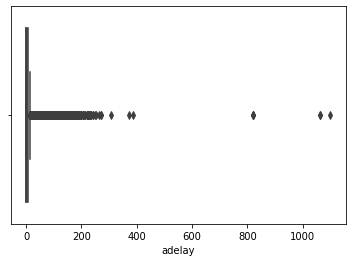

In [68]:
sns.boxplot(df_filtered.adelay)

In [ ]:
#adelay

#min: -1 (cancelled), 3986 trains
#no delay = 67343 trips
#30332 trips > 5 mins
#1892 trips > 60 mins
#37 trips > 200 mins
#13 trips > 250 mins
#max: 1100 (

#half of the trips have no adelay

#--> we could group the target in categories: cancelled, no delay, small delay, big delay
# or for simplicity merge cancelled with big delay?

In [ ]:
#we need to annotate direction

In [71]:
canc = df_filtered.adelay > 250
canc.sum()

13

In [74]:
df_filtered.arrTime.to_datetime()

AttributeError: 'Series' object has no attribute 'to_datetime'

In [85]:
#pd.to_datetime(df_filtered['arrTime'], format='%H%M')

pd.to_datetime(df_filtered['arrTime'], infer_datetime_format=True)

15       1970-01-01 00:00:00.000001906
36       1970-01-01 00:00:00.000001906
56       1970-01-01 00:00:00.000001906
79       1970-01-01 00:00:00.000001906
80       1970-01-01 00:00:00.000001906
                      ...             
289452   1970-01-01 00:00:00.000000711
289468   1970-01-01 00:00:00.000002212
289471   1970-01-01 00:00:00.000000711
289487   1970-01-01 00:00:00.000002212
289490   1970-01-01 00:00:00.000000711
Name: arrTime, Length: 130312, dtype: datetime64[ns]

In [79]:
df_filtered['adelay']

15         0
36        10
56        47
79        -1
80        29
          ..
289452     0
289468     2
289471     0
289487     2
289490    61
Name: adelay, Length: 130312, dtype: int64